In [209]:
import numpy as np
from matplotlib import pyplot as plt
from math import *

In [279]:
X = np.arange(0.00, 10.24, 0.01)

In [266]:
# функция построения графика f и f2 = FFTReverse(FFT(f))
# formula - текстовое описание функции (строка)
def plotting(f, f2, formula):
    
    plt.figure(figsize=((20,10)))
    plt.grid()
    plt.plot(X, f, label="до преобразования")
    plt.plot(X, f2, label="после преобразования")
    
    plt.xlabel("ось X", fontsize=18)
    plt.ylabel("ось Y", fontsize=18)
    plt.title(f"Преобразование Фурье функции f(x) = {formula}", fontsize=20)
    plt.legend()
    
    plt.show()

In [267]:
# дискретное преобразование Фурье для массивов малой (<=32) размерности
def DFT_slow(x, flag):
    # flag = 1 -> прямое ДПФ
    # flag = 0 -> обратное ДПФ
    sign = (-1) ** flag
    x = np.asarray(x, dtype=float)
    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * sign * np.pi * k * n / N)
    return np.dot(M, x)

In [320]:
# быстрое ДПФ, как прямое, так и обратное
def FFT(x, y, flag):
    # flag = 1 -> прямое ДПФ
    # flag = 0 -> обратное ДПФ
    sign = (-1) ** flag
    y = np.asarray(y, dtype=float)
    N = y.size
    
    if N <= 32:
        return DFT_slow(y, flag)
    else:
        X_even = FFT(x, y[::2], flag)
        X_odd = FFT(x, y[1::2], flag)
        factor = np.exp(2j * sign * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:int(N/2)] * X_odd, X_even + factor[int(N/2):] * X_odd])

In [269]:
# f(x) = |x|
def abs_x(x):
    return np.absolute(x)

In [270]:
# f(x) = x^2
def x_squared(x):
    return x ** 2

In [54]:
# f(x) = sin(x)
def sin_x(x):
    return np.sin(x)

In [55]:
# f(x) = sin(x^2)
def sin_x_squared(x):
    return np.sin(x ** 2)

In [56]:
# f(x) = sin(x) / x
def sin_x_div_x(x):
    return np.sin(x) / x

In [328]:
def solution(func, formula, d = 1):
    # d - количество последних коэф. в g, которые нужно обнулить
    Y = func(X) # находим значение функции
    f1 = FFT(X, Y, 1) # вычисляем прямое преобразование Фурье
    if d > 0:
        f1[-d:] = 0 # обнуляем коэффициенты
    f2 = FFT(X, f1, 0) # вычисляем обратное преобразование Фурье
    f2 = np.asarray(f2, dtype=float) / f2.size
    plotting(Y, f2, formula) # строим графики

In [314]:
def update_diapason(left, right, frequency = 1024):
    # frequency - частота дискретизации
    # left, right - границы диапазона
    step = (right - left) / frequency
    return np.arange(left, right, step)

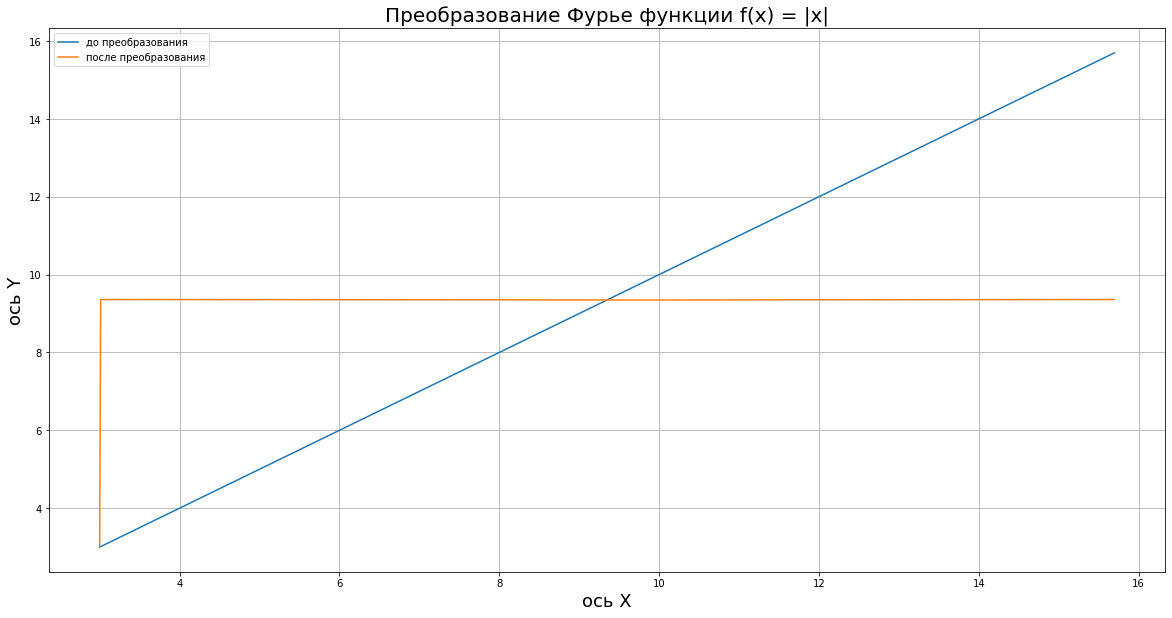

In [321]:
solution(abs_x, "|x|")

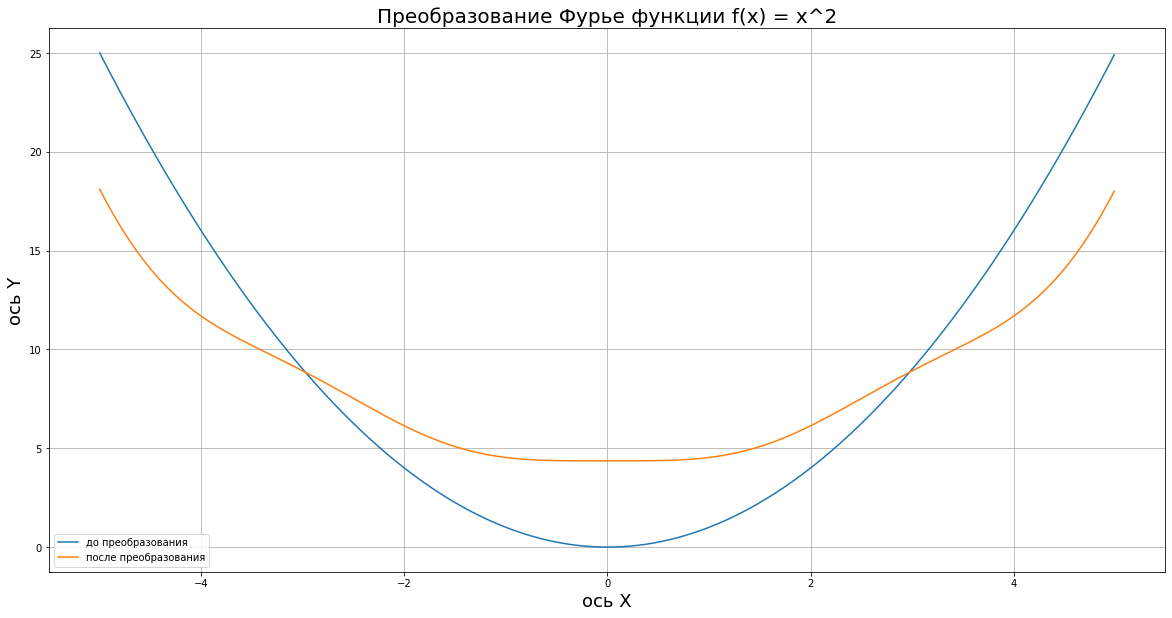

In [322]:
X = update_diapason(left = -5, right = 5)
solution(x_squared, "x^2", 3)

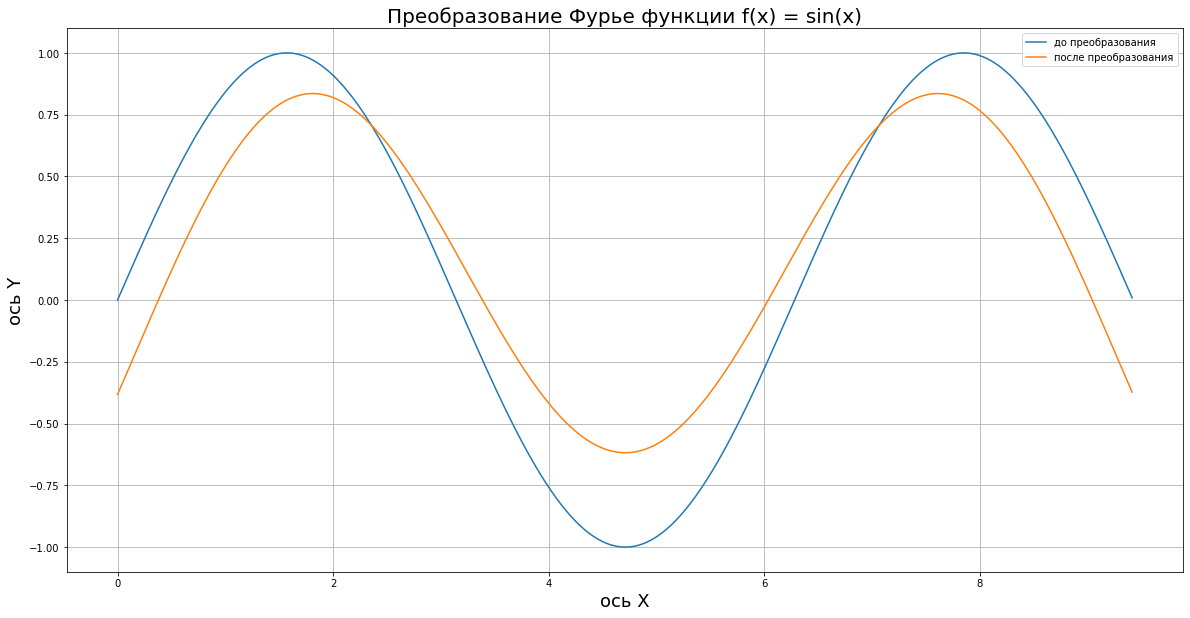

In [316]:
X = update_diapason(left = 0, right = 3 * np.pi)
solution(sin_x, "sin(x)")

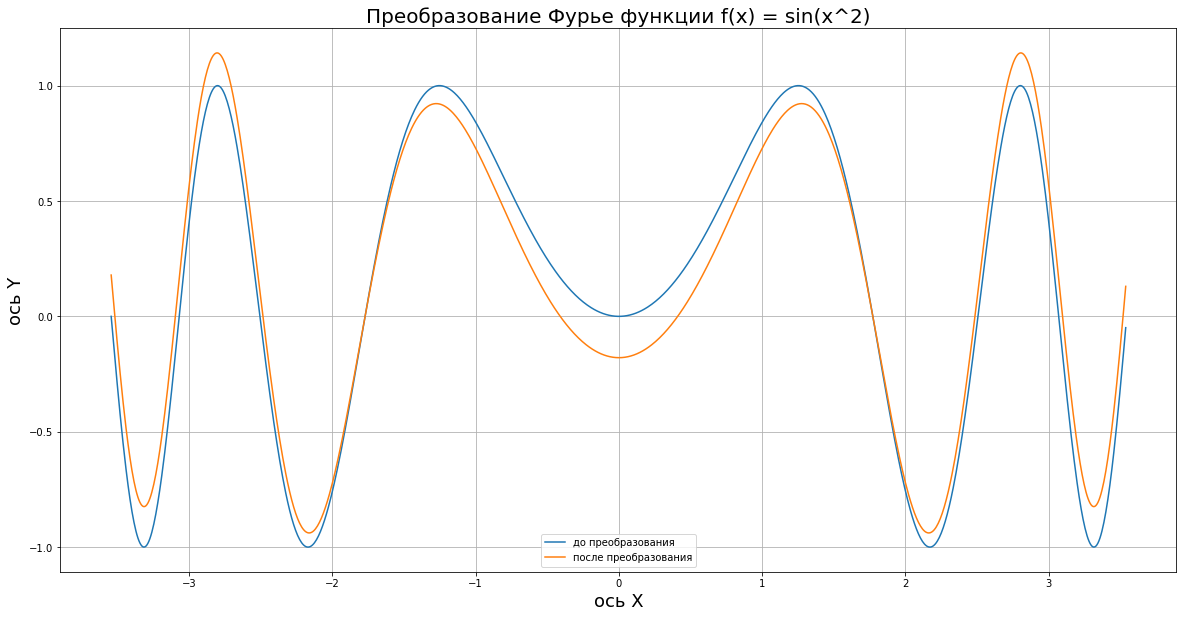

In [323]:
X = update_diapason(left = -2 * np.pi ** 0.5, right = 2 * np.pi ** 0.5)
solution(sin_x_squared, "sin(x^2)")

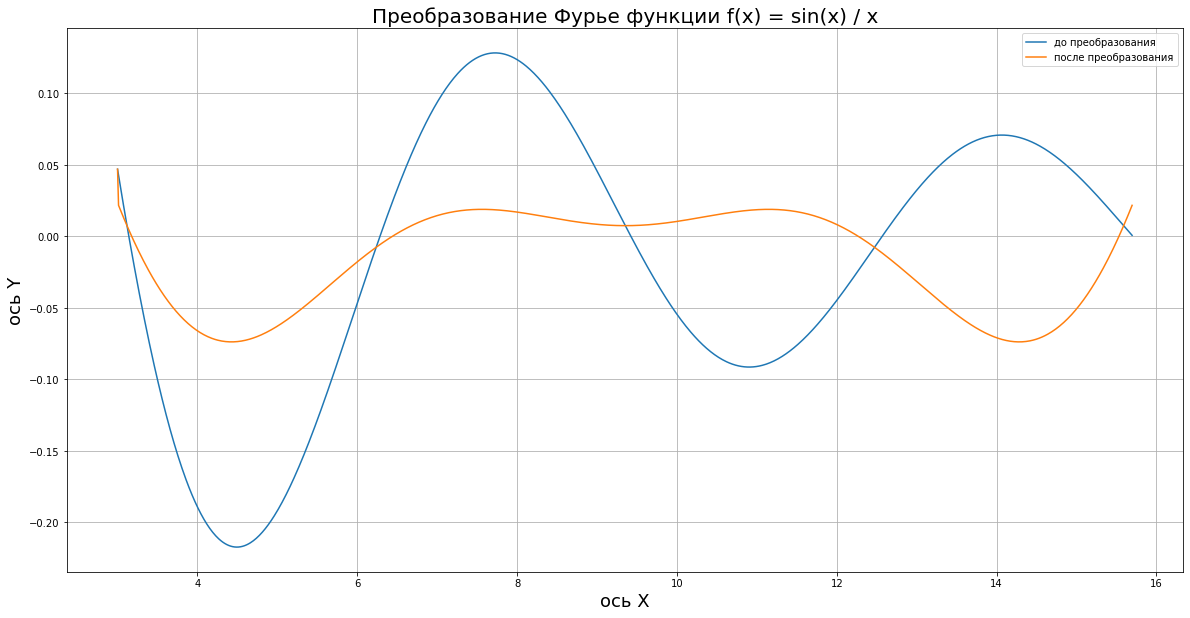

In [329]:
X = update_diapason(left = 3, right = 5 * np.pi)
solution(sin_x_div_x, "sin(x) / x", 0)